<a href="https://colab.research.google.com/github/AJTech2002/023293801_2932098232/blob/master/MathIA%20Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter



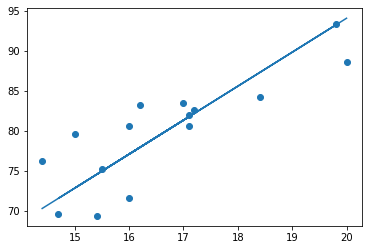

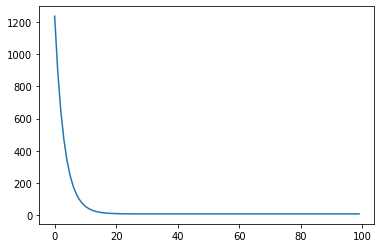

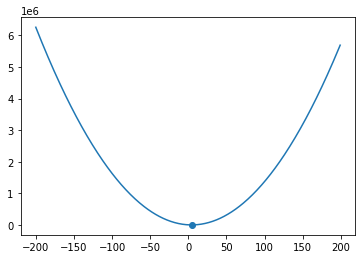

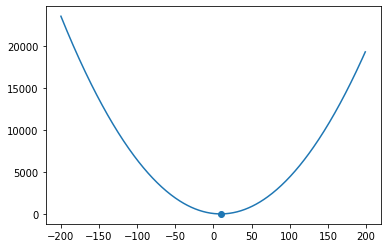

In [83]:

inputOutputPair = [[20,88.6],[16,17.6],[19.8,93.3],[18.4,84.3],[17.1,80.6],[15.5,75.2],[14.7,69.7],[17.1,82],[15.4,69.4],[16.2,83.3],[15,79.6],[17.2,82.6],[16,80.6],[17,83.5],[14.4,76.3]]
inputs = [20,16,19.8,18.4,17.1,15.5,14.7,17.1,15.4,16.2,15,17.2,16,17,14.4]
outputs = [88.6,71.6,93.3,84.3,80.6,75.2,69.7,82,69.4,83.3,79.6,82.6,80.6,83.5,76.3]

plt.scatter(inputs,outputs)

def randNumber (scale):
  return numpy.random.rand()*scale


# Bias
b0 = randNumber(20)
# Weight 1
b1 = randNumber(20)

def predict (b00, b11, inputs):

  values = [0]*len(inputs)
  x = -1
  for i in inputs: 
    x = x+1
    values[x] = i*b11 + b00
  return values

def fix (b0,b1,inputs,expected,predicted):
  newb0 = b0
  newb1 = b1

  x = -1
  b0Change = 0
  b1Change = 0
  for i in inputs: 
    x = x+1
    change = (-expected[x]+predicted[x])
    b0Change = b0Change + change
    b1Change = b1Change + change * inputs[x]
  
  b0Change = b0Change/(2*x)
  b1Change = b1Change/(2*x)
  
  newb0 -= b0Change*0.001
  newb1 -= b1Change*0.001

  return newb0, newb1




globalPred = []
errorOverTime = [0] * 100
iV =[0] * 100 
for i in range(0,100):
  globalPred = predict(b0,b1,inputs)
  iV[i] = i
  b0, b1 = fix(b0,b1,inputs,outputs,globalPred)

  error = errorPrediction(globalPred, outputs, inputs)
  errorOverTime[i] = error

  #if (error < 10):
  #  print ("Found at : " + str(error) + " => at " +  str(i) + "th iteration")
  #  break;

  ##if (i % 20 == 0):
  ##  plt.plot(inputs, predict(b0,b1,inputs))

plt.plot(inputs, predict(b0,b1,inputs))

fig3 = plt.figure()
ax3 = plt.axes()

ax3.plot(iV, errorOverTime)

minError = errorPrediction(globalPred, outputs, inputs)

def errorPrediction (prediction, expected, inputs):
  x = -1
  errorSum = 0
  for p in prediction: 
    x = x+1
    errorSum = errorSum + (expected[x]-p)*(expected[x]-p)
  errorSum = errorSum / (x*2)

  return errorSum

# X = b1 Y = b0
def f(xs, ys):
  p = predict(xs,ys, inputs)
  e = errorPrediction(p,outputs,inputs)

resultingErrors = [0]*400
inputWeight = [0]*400

x = -1
for y in range(-200, 200):
  x = x+1 
  inputWeight[x] = y
  resultingErrors[x] = errorPrediction(predict(b0,y,inputs),outputs,inputs)


fig = plt.figure()
ax = plt.axes()

ax.plot(inputWeight, resultingErrors)
ax.scatter([b1],minError)


resultingErrors = [0]*400
inputWeight = [0]*400

x = -1
for y in range(-200, 200):
  x = x+1 
  inputWeight[x] = y
  resultingErrors[x] = errorPrediction(predict(y,b1,inputs),outputs,inputs)

fig2 = plt.figure()
ax2 = plt.axes()

ax2.plot(inputWeight, resultingErrors)
ax2.scatter([b0],minError)
